In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
df=pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Lets check whether there are any records with missing target.

In [3]:
df['Churn'].isnull().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## We first need to convert the attribute TotalCharges to floating point datatype.

In [5]:
df=df.drop(['customerID'],axis=1)

In [6]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Since there are only 11 entreis missing,we can drop them.

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
numerical_features=[i for i in df.columns if df[i].dtype!='O']
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<AxesSubplot:>

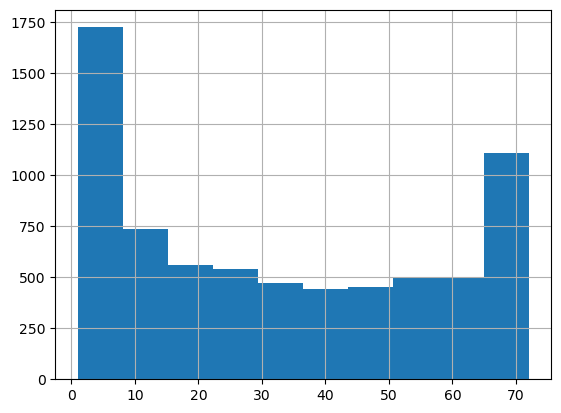

In [10]:
df['tenure'].hist(bins=10)

<AxesSubplot:>

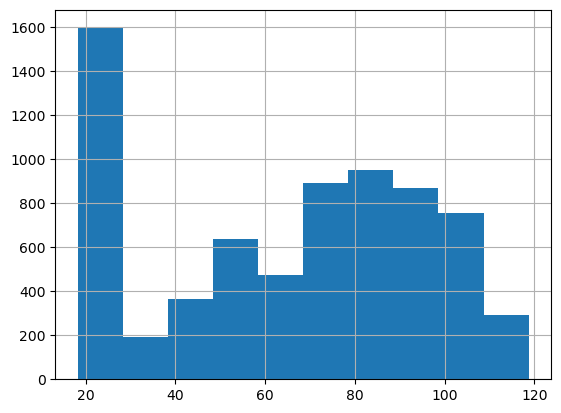

In [11]:
df['MonthlyCharges'].hist()

<AxesSubplot:>

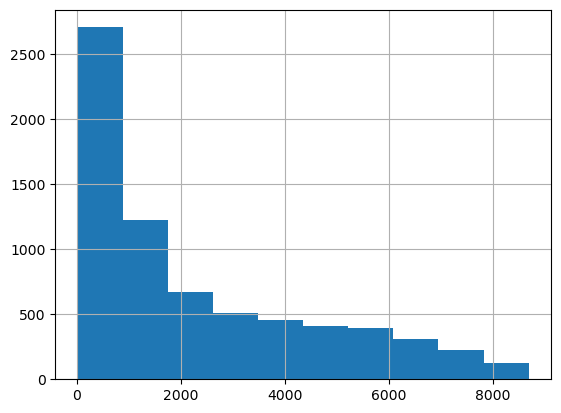

In [12]:
df['TotalCharges'].hist()

In [13]:
df['Churn'].replace(to_replace="Yes",value=1,inplace=True)
df['Churn'].replace(to_replace="No",value=0,inplace=True)

In [14]:
df_dummies=pd.get_dummies(df)
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


<AxesSubplot:>

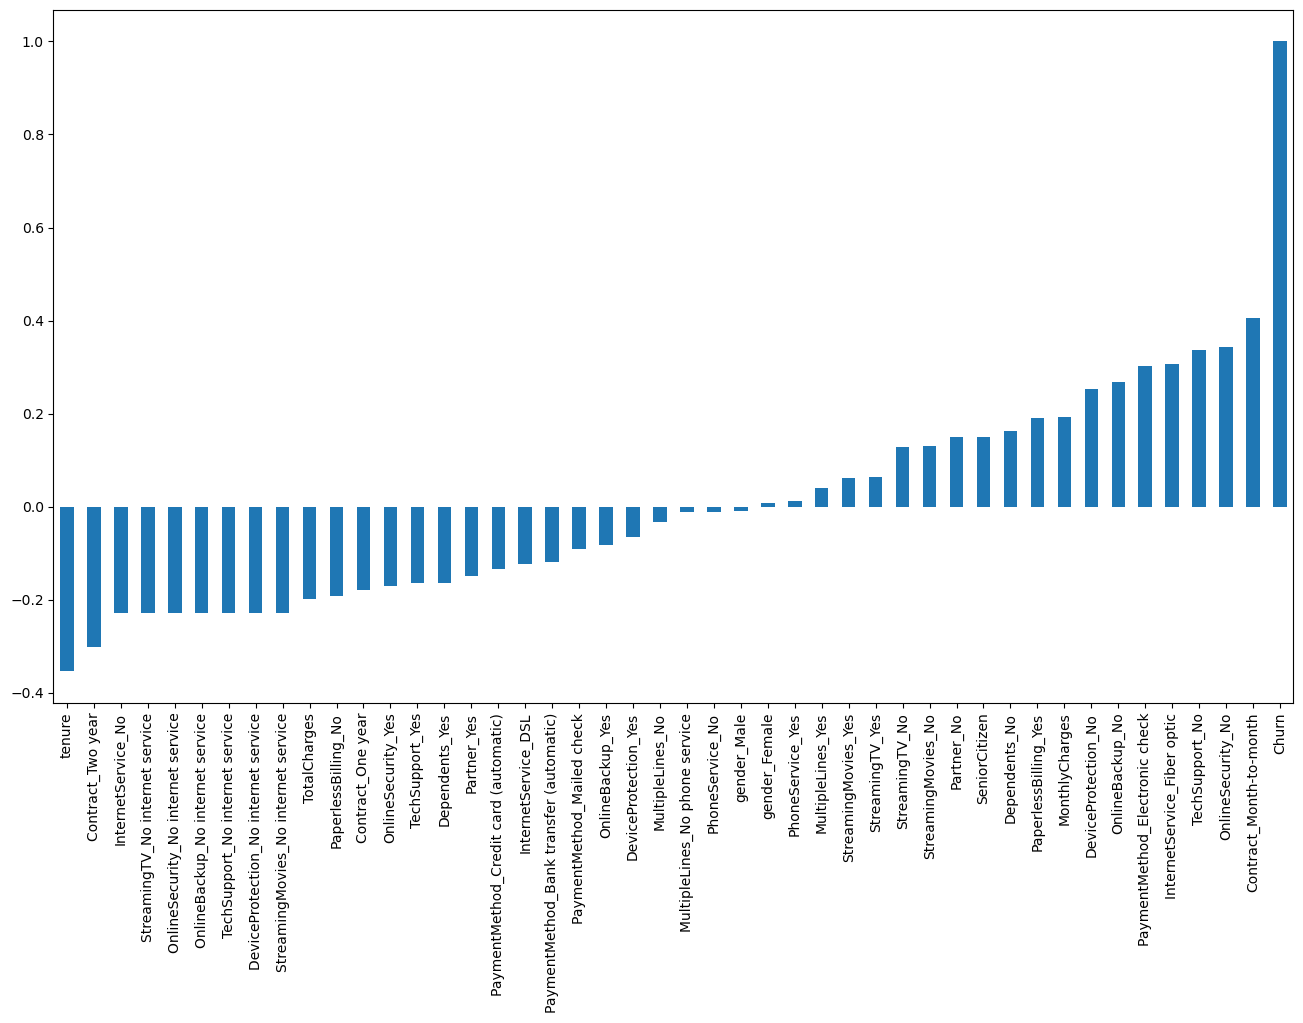

In [15]:
plt.figure(figsize=(16,9))
df_dummies.corr()["Churn"].sort_values(ascending=True).plot(kind='bar')

### Month to month conttracts,absence of Online security and tech support are positively correlated to churn,i.e. contributing factors to it.

### But tenure and two year contracts are nregatively correlated to churning,which may help in the marketing and billing plans.

# Lets analyze the other features now.

In [16]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [17]:
#nearly equal males and female customers are present
df["SeniorCitizen"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
# nearly similar ratios in this attribute as well
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [19]:
for i in df["Dependents"].value_counts():
    print(i/len(df["Dependents"]))

0.7015073947667805
0.2984926052332196


In [20]:
len((df[(df['Partner']=="Yes") & (df['Dependents']=='Yes')]))/len(df[df['Partner']=="Yes"])

0.5128205128205128

### So among the customers who have a partner,only half of them are dependent.

In [21]:
len((df[(df['Partner']=="No") & (df['Dependents']=='Yes')]))/len(df[df['Partner']=="No"])

0.09865347622973344

### So among the customers who don't have a partner,only nearly 10% of them are dependent.

In [22]:
len((df[(df['Partner']=="No") & (df['Dependents']=='Yes') & (df['gender']=='Male') ]))/len(df[df['Partner']=="No"])

0.05880736466062105

In [23]:
len((df[(df['Partner']=="No") & (df['Dependents']=='Yes') & (df['gender']=='Female') ]))/len(df[df['Partner']=="No"])

0.03984611156911239

C:\Users\Rushikesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

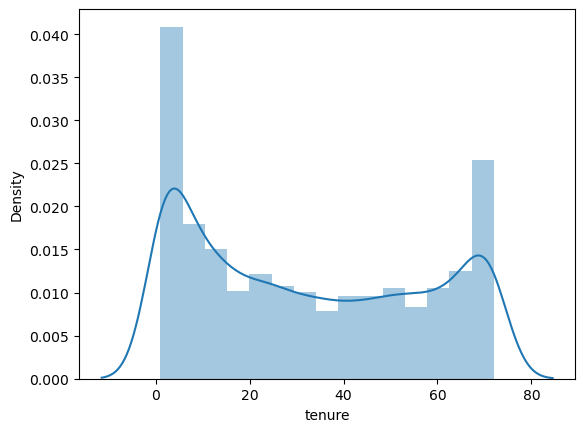

In [24]:
sbn.distplot(df['tenure'])

### As evident from the graph,the extremes are observed where the tenure is either very high or very less.

<AxesSubplot:>

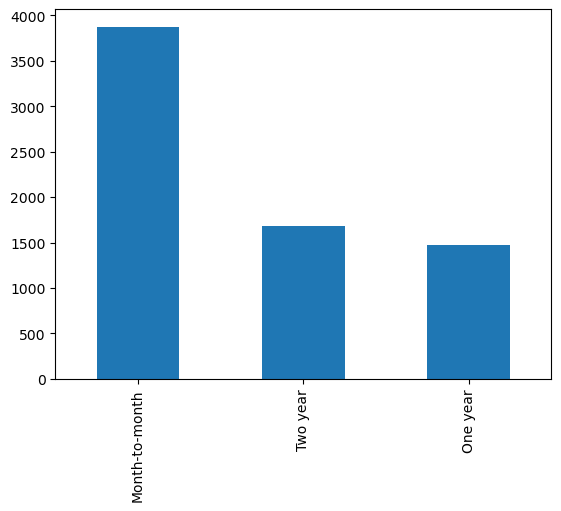

In [25]:
df['Contract'].value_counts().plot(kind='bar')

In [26]:
ls=[]
for i in df.columns:
    if i not in ['MonthlyCharges','TotalCharges']:
        ls.append(i)
ls

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

<AxesSubplot:xlabel='gender', ylabel='count'>

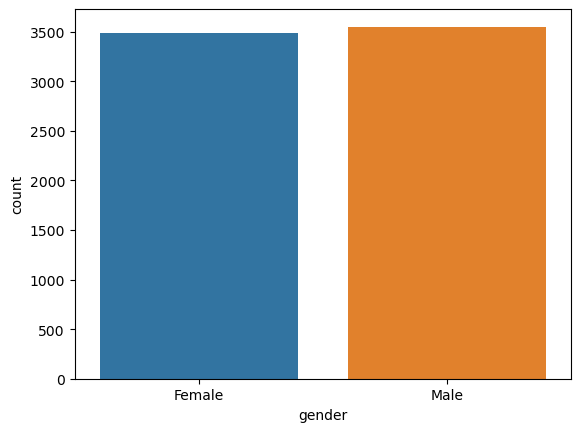

In [27]:
sbn.countplot(x='gender',data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

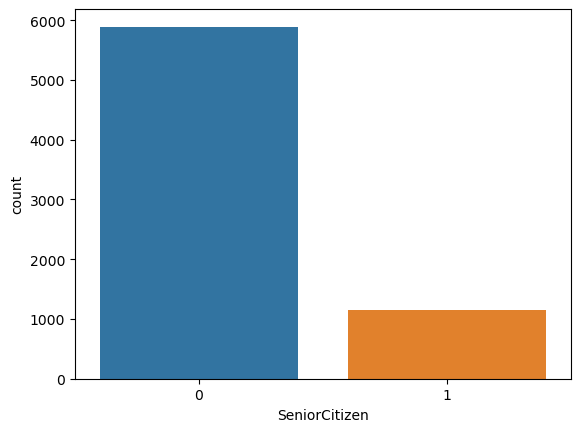

In [28]:
sbn.countplot(x='SeniorCitizen',data=df)

<AxesSubplot:xlabel='Partner', ylabel='count'>

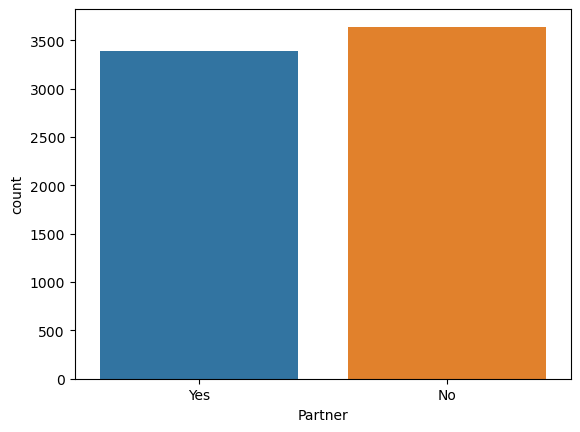

In [29]:
sbn.countplot(x='Partner',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

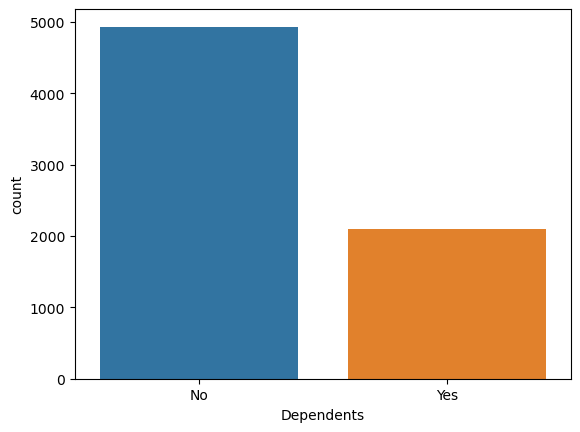

In [30]:
sbn.countplot(x='Dependents',data=df)

<AxesSubplot:xlabel='tenure', ylabel='count'>

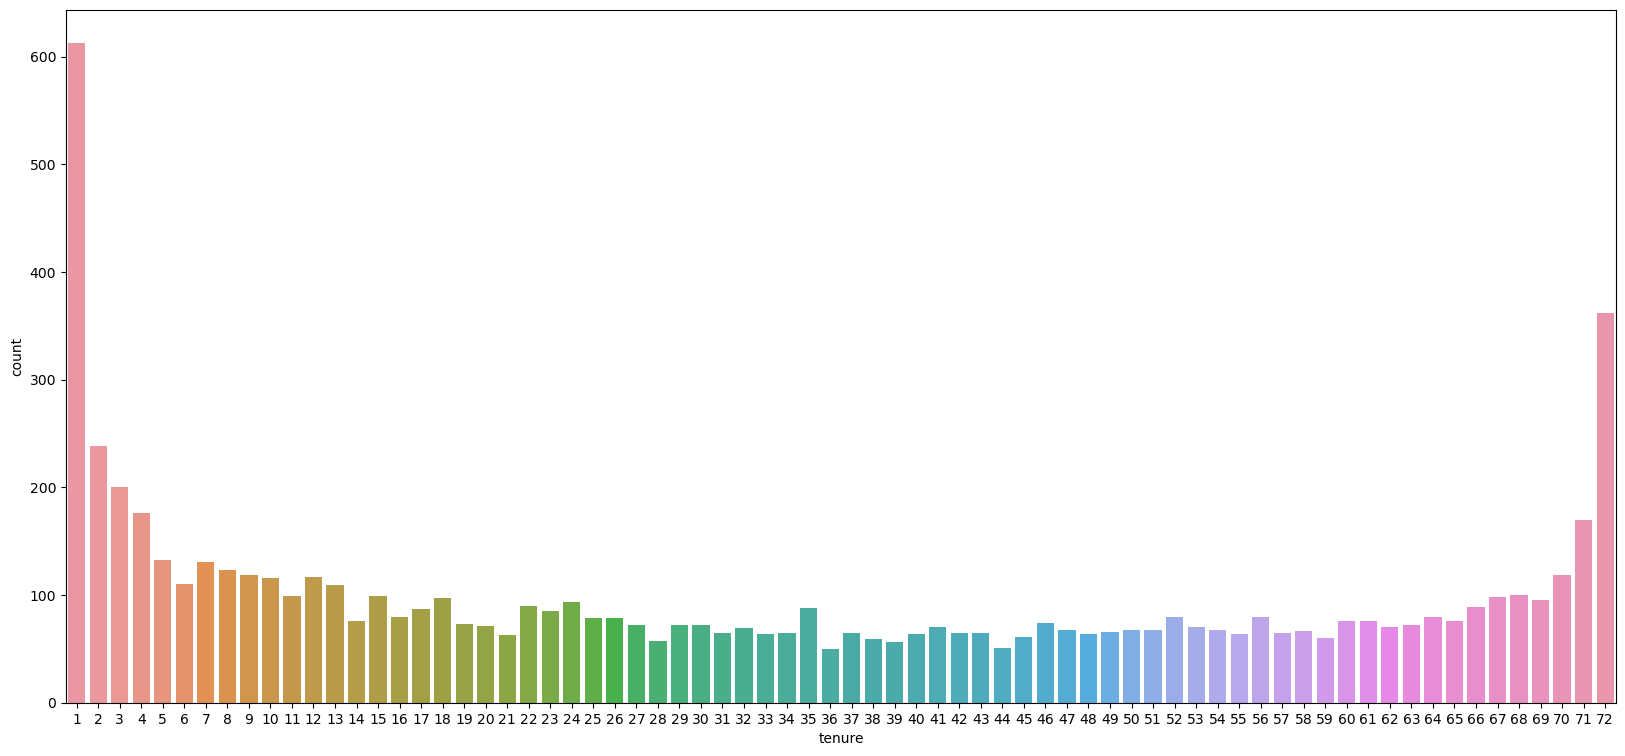

In [31]:
plt.figure(figsize=(20,9))
sbn.countplot(x='tenure',data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

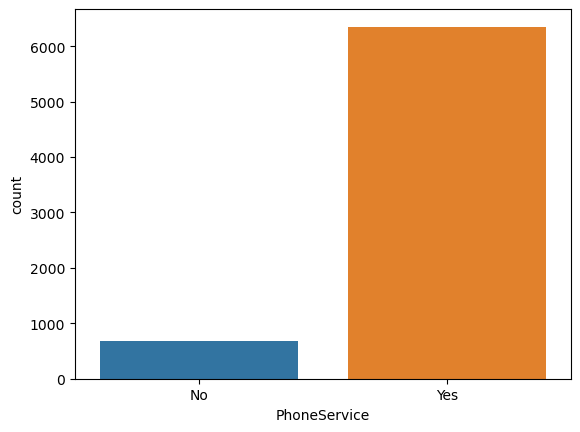

In [32]:
sbn.countplot(x='PhoneService',data=df)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

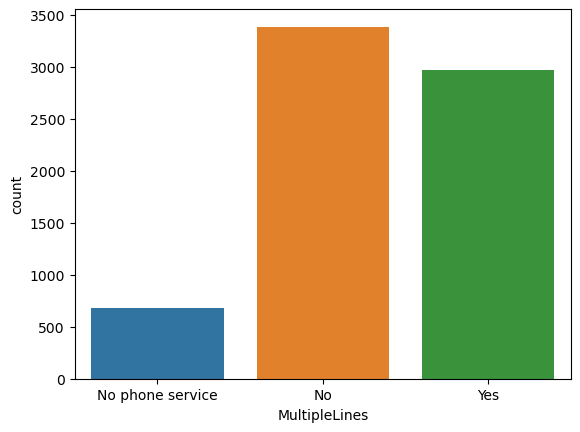

In [33]:
sbn.countplot(x='MultipleLines',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

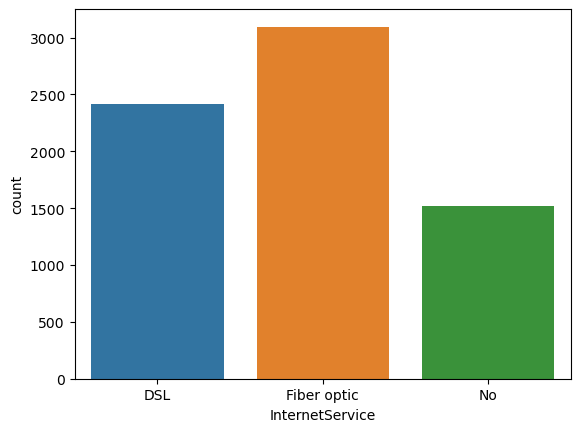

In [34]:
sbn.countplot(x='InternetService',data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

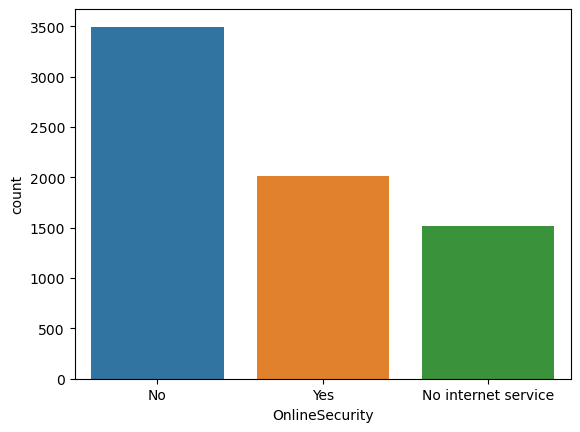

In [35]:
sbn.countplot(x='OnlineSecurity',data=df)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

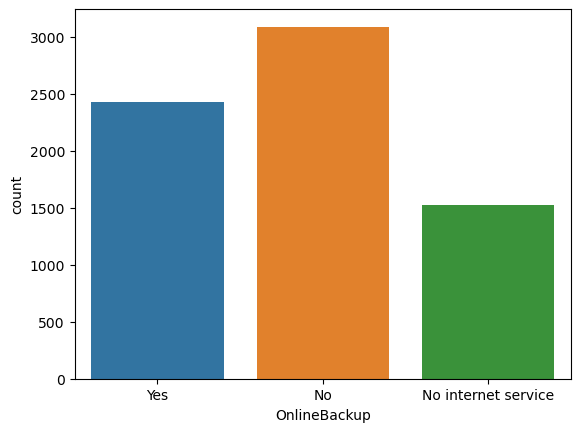

In [36]:
sbn.countplot(x='OnlineBackup',data=df)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

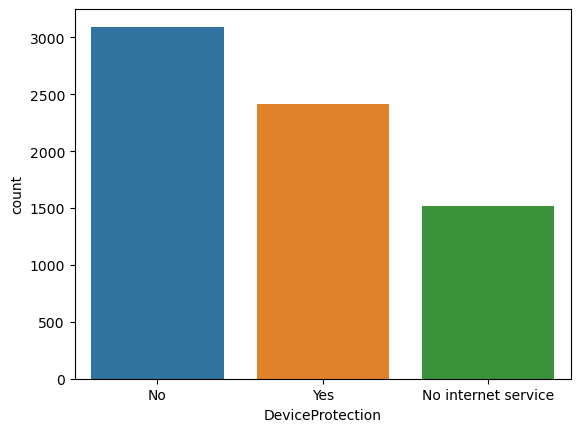

In [37]:
sbn.countplot(x='DeviceProtection',data=df)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

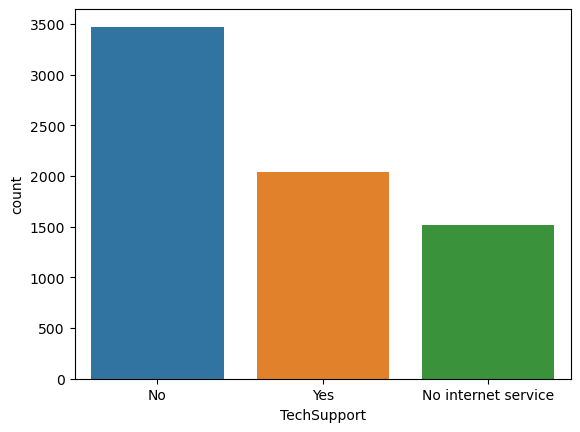

In [38]:
sbn.countplot(x='TechSupport',data=df)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

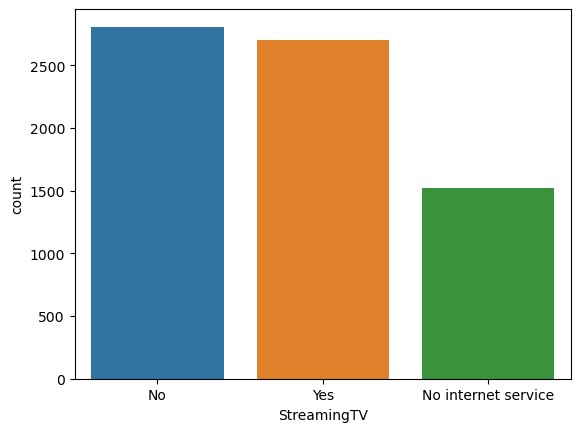

In [39]:
sbn.countplot(x='StreamingTV',data=df)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

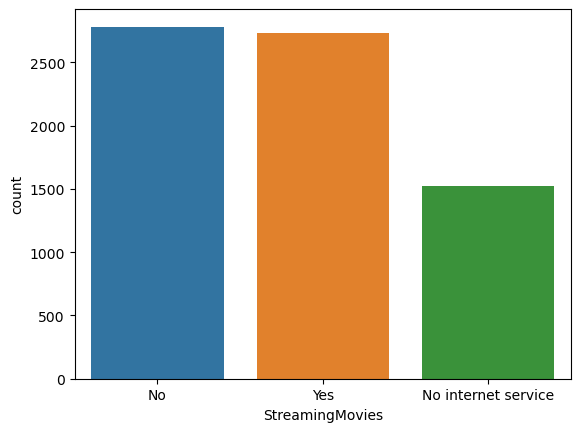

In [40]:
sbn.countplot(x='StreamingMovies',data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

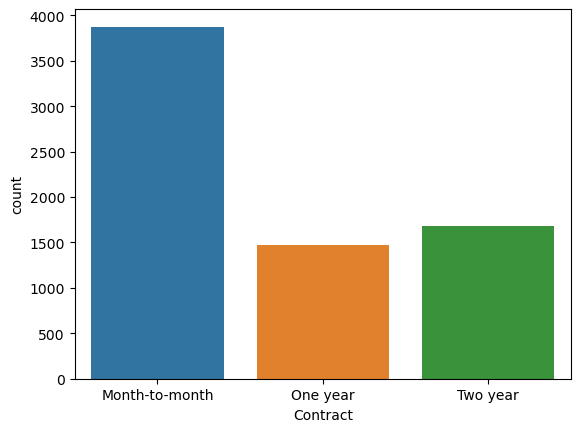

In [41]:
sbn.countplot(x='Contract',data=df)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

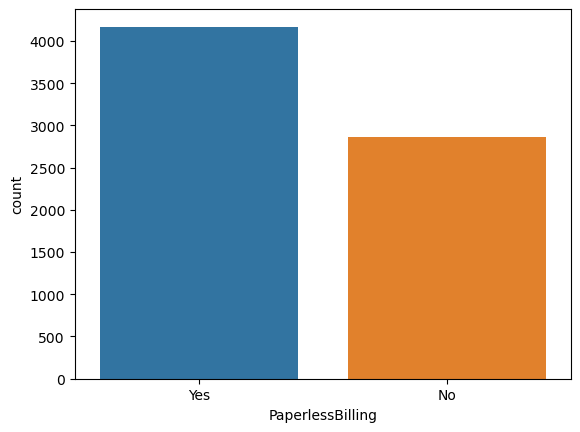

In [42]:
sbn.countplot(x='PaperlessBilling',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

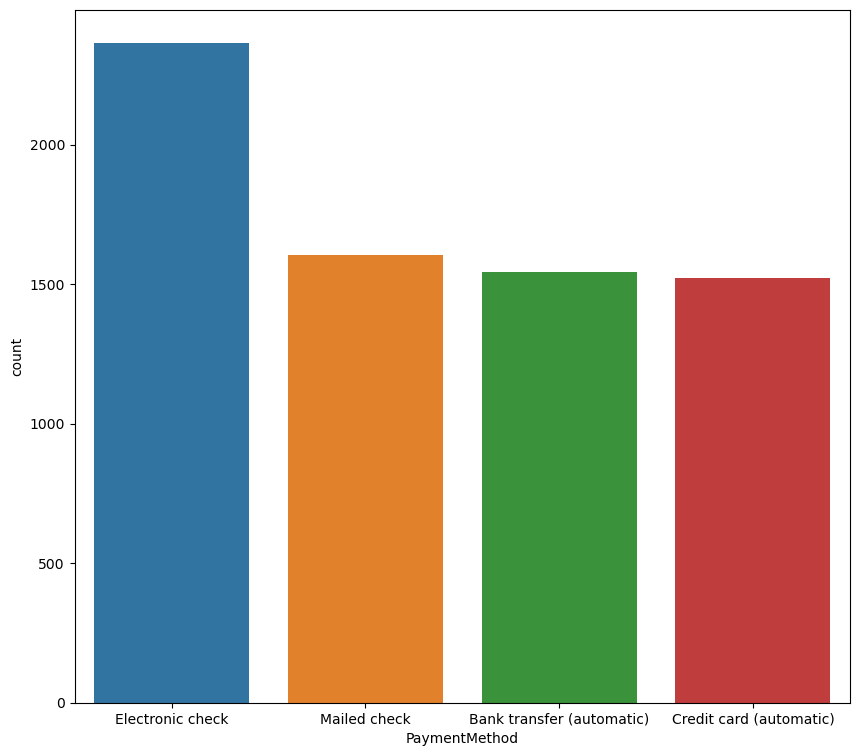

In [43]:
plt.figure(figsize=(10,9))
sbn.countplot(x='PaymentMethod',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

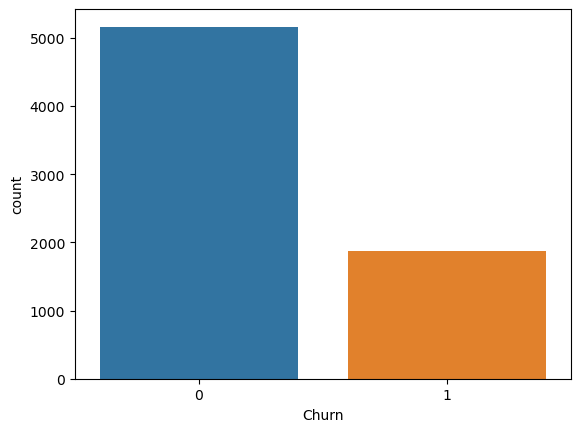

In [44]:
sbn.countplot(x='Churn',data=df)

### The target variable is imbalanced,which can lead to biased performance of our model.

[]

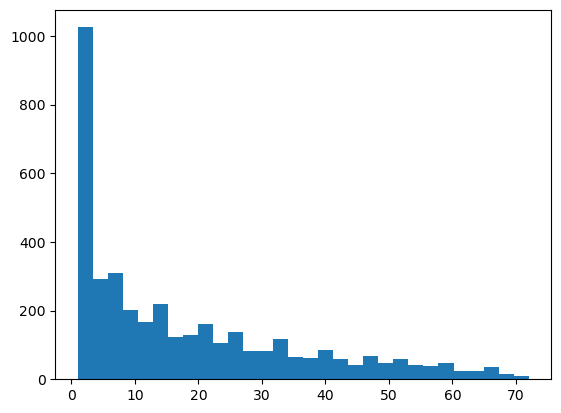

In [45]:
plt.hist(df[df['Contract']=='Month-to-month']['tenure'],bins=30)
plt.plot()

[]

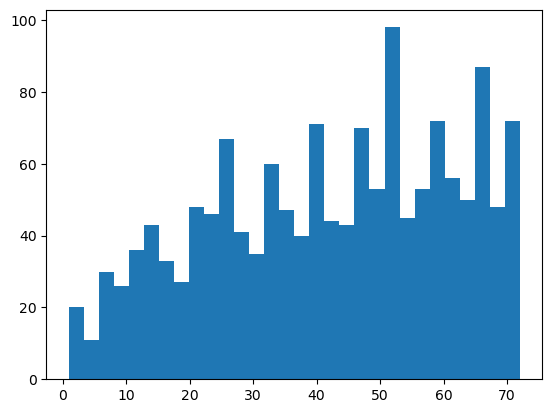

In [46]:
plt.hist(df[df['Contract']=='One year']['tenure'],bins=30)
plt.plot()

[]

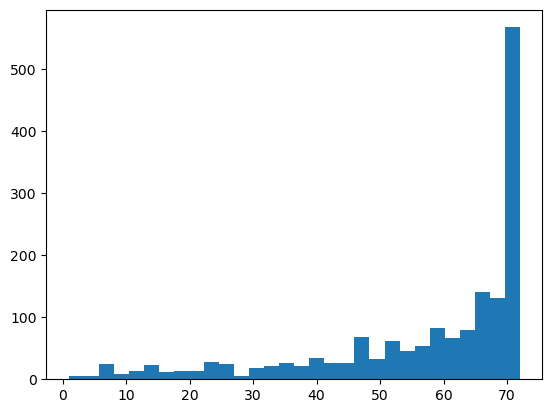

In [47]:
plt.hist(df[df['Contract']=='Two year']['tenure'],bins=30)
plt.plot()

C:\Users\Rushikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

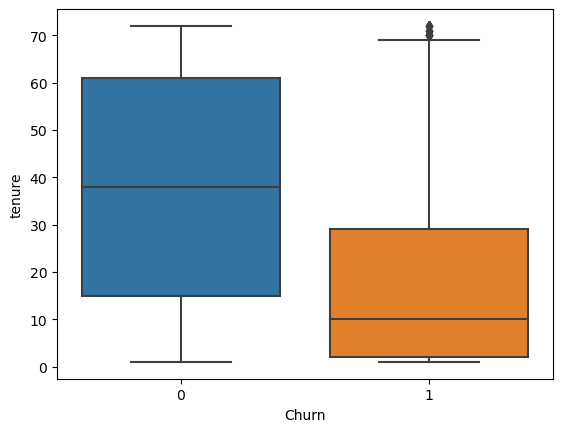

In [48]:
sbn.boxplot(df.Churn,df.tenure)

<AxesSubplot:xlabel='Churn'>

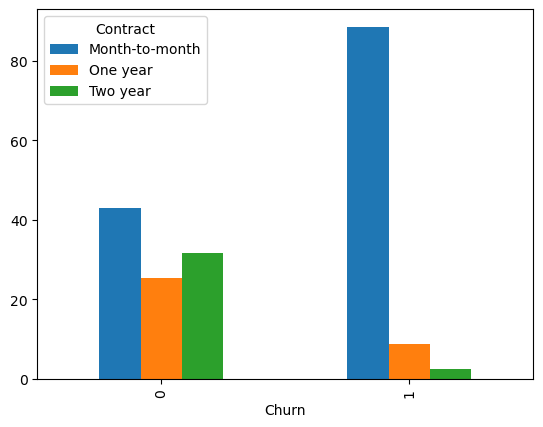

In [49]:
contract_churn=df.groupby(['Churn','Contract']).size().unstack()
contract_churn=contract_churn.T*100/contract_churn.T.sum()
contract_churn=contract_churn.T
contract_churn.plot(kind='bar')

<AxesSubplot:xlabel='Churn'>

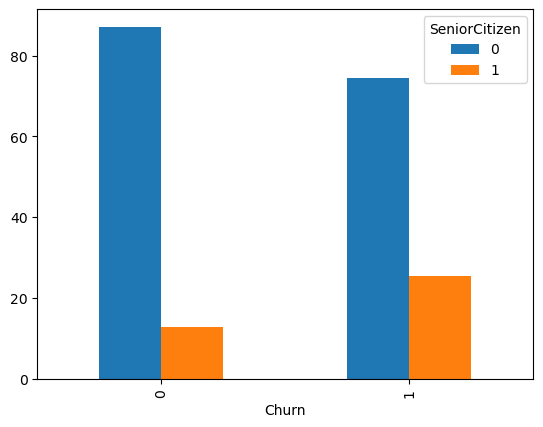

In [50]:
contract_churn=df.groupby(['Churn','SeniorCitizen']).size().unstack()
contract_churn=contract_churn.T*100/contract_churn.T.sum()
contract_churn=contract_churn.T
contract_churn.plot(kind='bar')

C:\Users\Rushikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

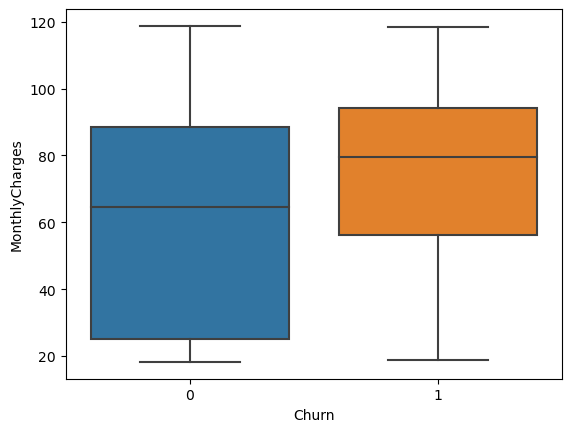

In [51]:
sbn.boxplot(df.Churn,df.MonthlyCharges)

C:\Users\Rushikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

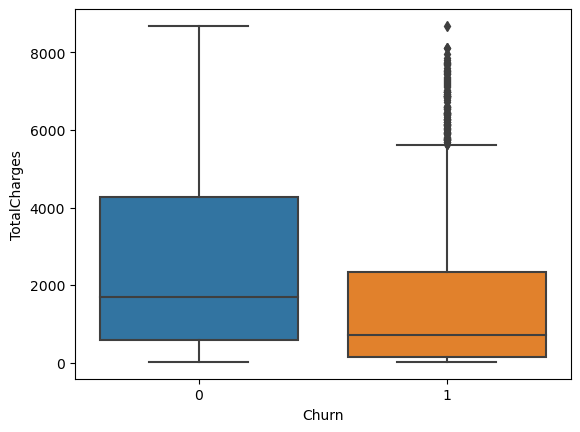

In [52]:
sbn.boxplot(df.Churn,df.TotalCharges)

# Now lets create models using the above processed data.

In [53]:
#splitting the data into training and testing subsets.
X=df_dummies.drop('Churn',axis=1)
y=df_dummies['Churn']

from sklearn.preprocessing import MinMaxScaler
features=X.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))
X.columns=features

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2959,0.0,0.323944,0.399005,0.153254,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5105,0.0,0.985915,0.949254,0.940226,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5354,0.0,0.971831,0.070647,0.195748,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5066,0.0,0.676056,0.011940,0.104143,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
156,0.0,0.295775,0.655721,0.208072,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.000000,0.006468,0.000012,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3264,0.0,0.901408,0.065174,0.182570,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1653,0.0,0.690141,0.872637,0.614240,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2607,0.0,0.183099,0.618905,0.129039,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [56]:
y_train

2964    0
5113    0
5363    0
5074    0
156     0
       ..
4939    0
3269    0
1658    1
2612    0
2737    0
Name: Churn, Length: 5625, dtype: int64

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [58]:
from sklearn import metrics
yhat=logistic.predict(X_test)
print("Accuracy for logistic regression is:",metrics.accuracy_score(y_test,yhat))

Accuracy for logistic regression is: 0.8031272210376688


### Lets analyze the churn rate according to weights of the features.

In [59]:
important_features=pd.Series(logistic.coef_[0],index=X.columns.values,dtype='float64')

<AxesSubplot:>

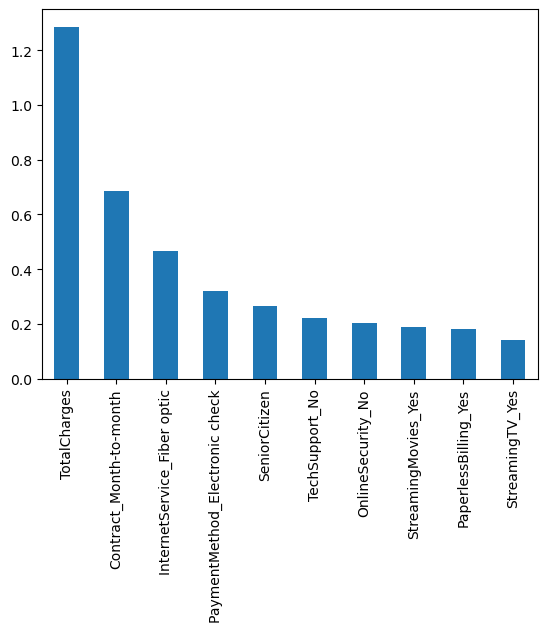

In [60]:
important_features.sort_values(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:>

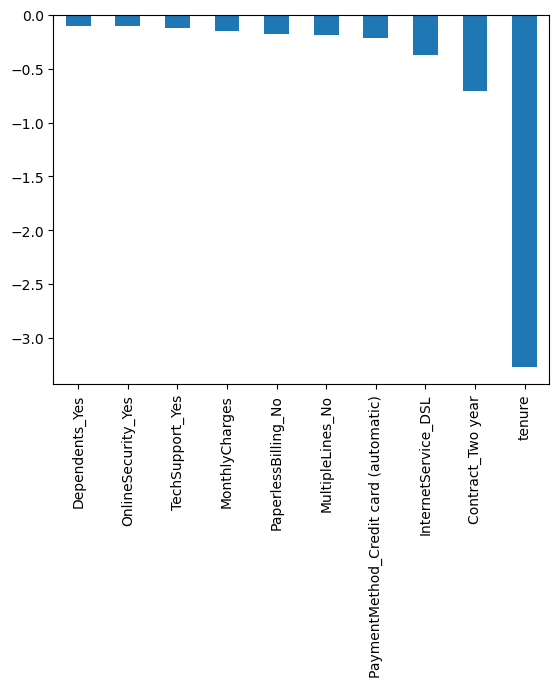

In [61]:
important_features.sort_values(ascending=False)[-10:].plot(kind='bar')

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
prediction_test = random_forest.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7953091684434968


<AxesSubplot:>

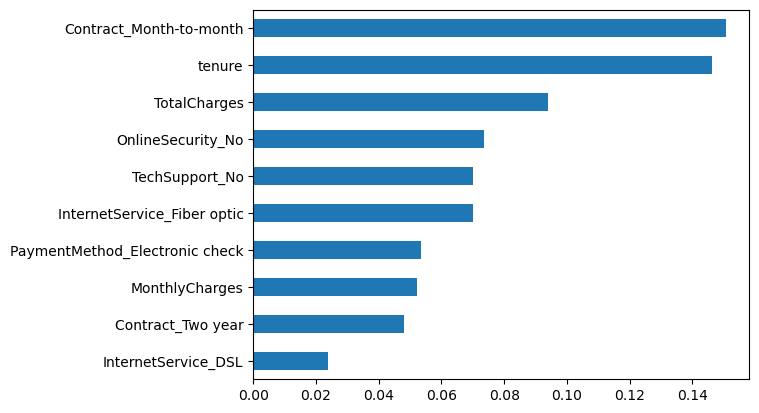

In [69]:
important_features=random_forest.feature_importances_
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Support Vecor Machine (SVM)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
from sklearn.svm import SVC
svm = SVC(kernel='linear') 
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [73]:
preds = svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8002842928216063

In [74]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[930 108]
 [173 196]]


## Naive Bayes

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [78]:
yhat=naive_bayes.predict(X_test)
metrics.accuracy_score(y_test,yhat)

0.6993603411513859

## XG Boost

In [79]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [80]:
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.783226723525231

# So logistic regression has highest accuracy of 80.3%.

### Reference:https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction